In [23]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
# libraries web scraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import re
import csv

In [24]:
df = pd.read_csv('data_oyo.csv')

In [25]:
del df['Unnamed: 0'] #-----deleting unwanted column
del df['index'] #-----deleting unwanted column
del df['Unnamed: 0.1'] #-----deleting unwanted column

In [26]:
df

,Hotel_name,Adress,Price,Original_price,Ratings,Discount
0,OYO Townhouse RCC Elite 265 Begumpet,"Opp to Js babu silks., Hyderabad",₹1099,₹4095,4.6 (3088 Ratings)·Excellent,73% off
1,Capital O 71317 White Ridge,"Near Khazana Jewellery, Dilsukhnagar, Hyderabad",₹1199,₹4989,4.6 (1930 Ratings)·Excellent,75% off
2,OYO Flagship 60834 Kaashyapasa Homes,"hitech city MMTS, Hyderabad",₹1099,₹3088,4.4 (800 Ratings)·Very Good,64% off
3,OYO 49253 Raja Residency,"Near Raja Deluxe Complex, Musheerabad, Hyderabad",₹1049,₹3148,4.5 (3722 Ratings)·Excellent,66% off
4,OYO Flagship 61858 Hotel Banyan Tree,"Centrally Located, Near Huda Park, Kukatpally,...",₹1099,₹3272,4.6 (2825 Ratings)·Excellent,66% off
...,...,...,...,...,...,...
507,OYO Flagship 49925 Divi Heritage Inn,"Indian Oil Bunk, Behind SM Hospital, Ooty",₹1778,₹3508,3.8 (45 Ratings)·Good,49% off
508,OYO 77682 Mohans Cottage,"Lovedale Junction, Ooty",₹1741,₹4070,NEW,57% off
509,OYO 78121 Red Rock,"Near Funcity, Ooty",₹1673,₹3938,4.3 (62 Ratings)·Very Good,57% off
510,OYO 78094 Cool Spot Cottage,"Charing Cross, Ooty",₹1854,₹4163,3.8 (90 Ratings)·Good,55% off


In [10]:
del df['Unnamed: 0'] #-----deleting unwanted column
del df['index'] #-----deleting unwanted column
del df['Unnamed: 0.1'] #-----deleting unwanted column
df['city'] = df.Adress.apply(lambda x:x.split()[-1]) #-----splitting adress to new column 'city'
df['location'] = df.Adress.apply(lambda x:x.split()[:-2]) #-----splitting adress to another new column 'location'
df['Area'] = df.Hotel_name.apply(lambda x:' '.join(x.split()[-2:])) #-----splitting hotel name to new column 'area'
df['Rating'] = df.Ratings.apply(lambda x:x.split()[0]) #-----splitting ratings  to new column 'rating' for numeric values
df['Rating_summary'] = df.Ratings.apply(lambda x:x.split('·')[-1]) #-----splitting ratings  to new column 'Rating summary' 
df['Price'] = df['Price'].str.replace('₹', ' ') #-----removing rupee  symbol in 'price' column
df['Original_price'] = df['Original_price'].str.replace('₹', ' ') #-----removing rupee symbol in 'original_price' column
df['Original_price'] = df.Original_price.astype(int) #-----converting original_price into 'int' 
df['Price'] = df.Price.astype(int) #-----converting price into 'int'
df["Price_Flucations"] = (df["Original_price"]- df["Price"]) #-----from both original price and price we took a new 
                                                                                      #----column 'price fluctuation'
df['Discount%'] = df.Discount.apply(lambda x:x.split()[-2])  #-----splitting discount column for only numeric values 
df['%_Discount']=df['Discount%'].str.replace('%','').astype(int) #-----removing special charecters in discount column
del df['Adress'] #-----deleting unwanted column
del df['Ratings'] #-----deleting unwanted column
del df['Discount'] #-----deleting unwanted column
del df['Discount%'] #-----deleting unwanted column

In [11]:
df

,Hotel_name,Price,Original_price,city,location,Area,Rating,Rating_summary,Price_Flucations,%_Discount
0,OYO Townhouse RCC Elite 265 Begumpet,1099,4095,Hyderabad,"[Opp, to, Js, babu]",265 Begumpet,4.6,Excellent,2996,73
1,Capital O 71317 White Ridge,1199,4989,Hyderabad,"[Near, Khazana, Jewellery,]",White Ridge,4.6,Excellent,3790,75
2,OYO Flagship 60834 Kaashyapasa Homes,1099,3088,Hyderabad,"[hitech, city]",Kaashyapasa Homes,4.4,Very Good,1989,64
3,OYO 49253 Raja Residency,1049,3148,Hyderabad,"[Near, Raja, Deluxe, Complex,]",Raja Residency,4.5,Excellent,2099,66
4,OYO Flagship 61858 Hotel Banyan Tree,1099,3272,Hyderabad,"[Centrally, Located,, Near, Huda, Park,]",Banyan Tree,4.6,Excellent,2173,66
...,...,...,...,...,...,...,...,...,...,...
507,OYO Flagship 49925 Divi Heritage Inn,1778,3508,Ooty,"[Indian, Oil, Bunk,, Behind, SM]",Heritage Inn,3.8,Good,1730,49
508,OYO 77682 Mohans Cottage,1741,4070,Ooty,[Lovedale],Mohans Cottage,NEW,NEW,2329,57
509,OYO 78121 Red Rock,1673,3938,Ooty,[Near],Red Rock,4.3,Very Good,2265,57
510,OYO 78094 Cool Spot Cottage,1854,4163,Ooty,[Charing],Spot Cottage,3.8,Good,2309,55


In [12]:
df.to_csv('oyo_new.csv')

In [13]:
data = pd.read_csv('oyo_new.csv')

In [14]:
data['Price'].max()

3540

In [15]:
data['Rating'].value_counts() #----- in rating we have null values 
data['Rating'].replace('NEW',np.nan,inplace=True) #-----replacing it with nan
data['Rating']= data['Rating'].astype(float) #-----converting rating column to float
nlmean = data['Rating'].median() #----- nd makin it as medain value
data['Rating'].fillna(nlmean,inplace = True) #-----filling the null values

In [16]:
data['location'] = data.location.apply(lambda x:x.replace('[','').replace(']','')) #-----removing special charecters in location column
data['location'] = data.location.apply(lambda x:x.replace("'",'').replace(',','')) 

In [19]:
data1 = data.copy()
data1.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [21]:
data1

,Hotel_name,Price,Original_price,city,location,Area,Rating,Rating_summary,Price_Flucations,%_Discount
0,OYO Townhouse RCC Elite 265 Begumpet,1099,4095,Hyderabad,Opp to Js babu,265 Begumpet,4.6,Excellent,2996,73
1,Capital O 71317 White Ridge,1199,4989,Hyderabad,Near Khazana Jewellery,White Ridge,4.6,Excellent,3790,75
2,OYO Flagship 60834 Kaashyapasa Homes,1099,3088,Hyderabad,hitech city,Kaashyapasa Homes,4.4,Very Good,1989,64
3,OYO 49253 Raja Residency,1049,3148,Hyderabad,Near Raja Deluxe Complex,Raja Residency,4.5,Excellent,2099,66
4,OYO Flagship 61858 Hotel Banyan Tree,1099,3272,Hyderabad,Centrally Located Near Huda Park,Banyan Tree,4.6,Excellent,2173,66
...,...,...,...,...,...,...,...,...,...,...
507,OYO Flagship 49925 Divi Heritage Inn,1778,3508,Ooty,Indian Oil Bunk Behind SM,Heritage Inn,3.8,Good,1730,49
508,OYO 77682 Mohans Cottage,1741,4070,Ooty,Lovedale,Mohans Cottage,4.0,NEW,2329,57
509,OYO 78121 Red Rock,1673,3938,Ooty,Near,Red Rock,4.3,Very Good,2265,57
510,OYO 78094 Cool Spot Cottage,1854,4163,Ooty,Charing,Spot Cottage,3.8,Good,2309,55


In [18]:
data1['Rating'].describe()

count    512.000000
mean       4.060547
std        0.315059
min        3.500000
25%        3.900000
50%        4.000000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64

# Univariate analysis

####  PIE PLOT

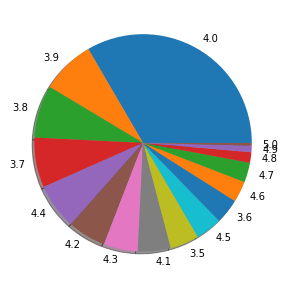

In [19]:
plt.figure(figsize = (10,5))
plt.pie(data1['Rating'].value_counts(),labels=list(data1['Rating'].value_counts().index),shadow=True);

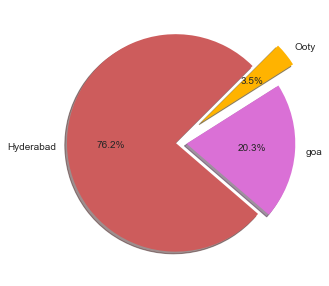

In [110]:
plt.figure(figsize=(10,5))
lable=["Hyderabad","goa","Ooty"]
colors= ['#cd5c5c','#da70d6','#FFB300']
plt.pie(data1["city"].value_counts(),colors=colors,labels=lable,startangle=45,autopct="%1.1f%%",shadow=True,explode=[0,0.1,0.3])
plt.show()

# countplot

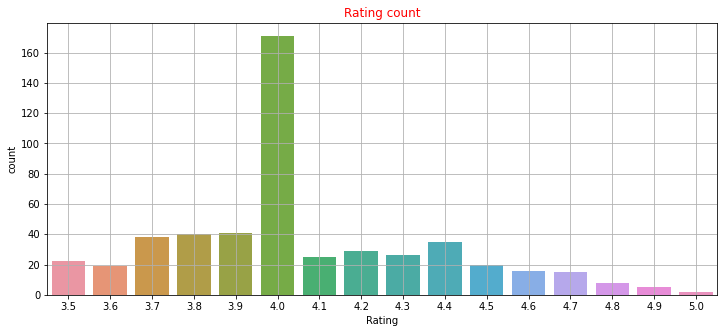

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x=data1["Rating"])
plt.grid()
plt.title('Rating count',color='r')
plt.show()

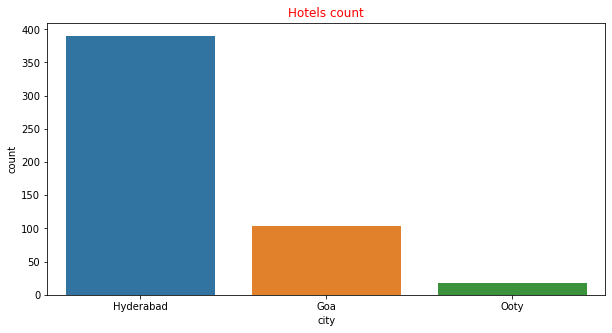

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(x=data1["city"])
plt.title('Hotels count',color='r')
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


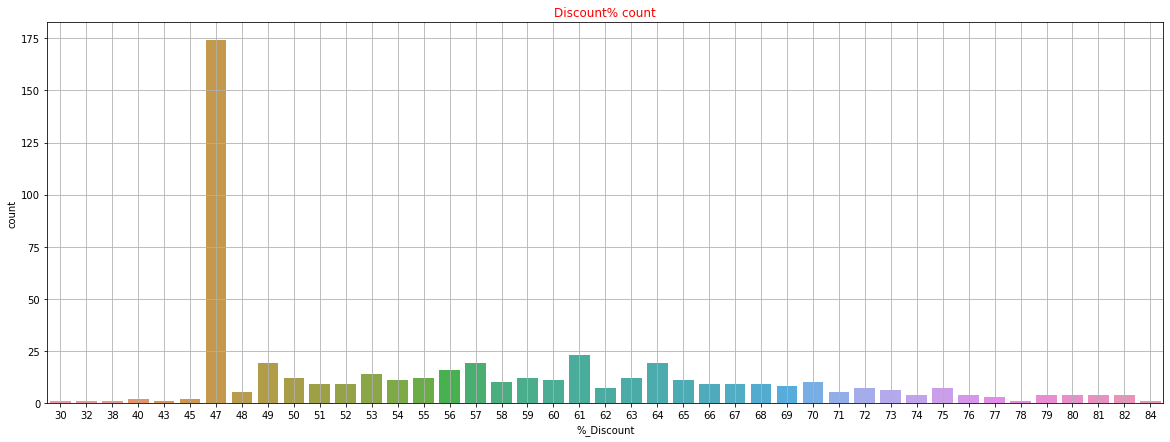

In [87]:
plt.figure(figsize=(20,7))
sns.countplot(data1["%_Discount"])
plt.grid()
plt.title('Discount% count',color = 'r')
plt.show()


# distplot

C:\Users\Admin\AppData\Local\Temp/ipykernel_5216/2946312884.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('PRICE COUNT',COLOR='r')


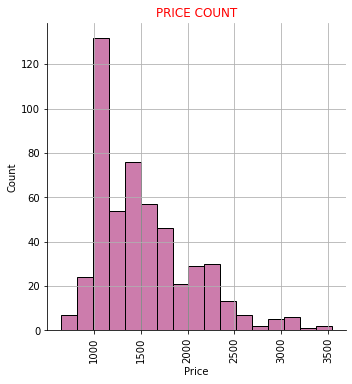

In [88]:

sns.displot(x=data1["Price"],color = '#bc5090')
plt.xticks(rotation = 90)
plt.title('PRICE COUNT',COLOR='r')
plt.grid()
plt.show()

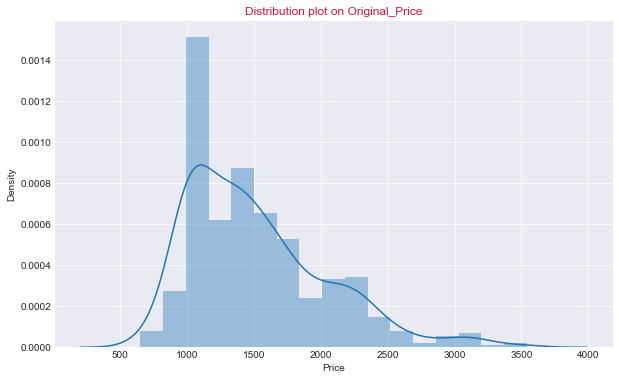

In [138]:
plt.figure(figsize=(10,6))
sns.distplot(data1["Price"])
plt.title("Distribution plot on Original_Price",color="Crimson")
plt.show()


# histogram

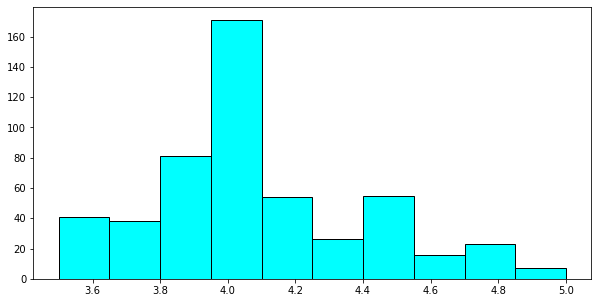

In [90]:
plt.figure(figsize=(10,5))
plt.hist(data1["Rating"],bins=10,color = 'cyan',edgecolor="k")
plt.show()

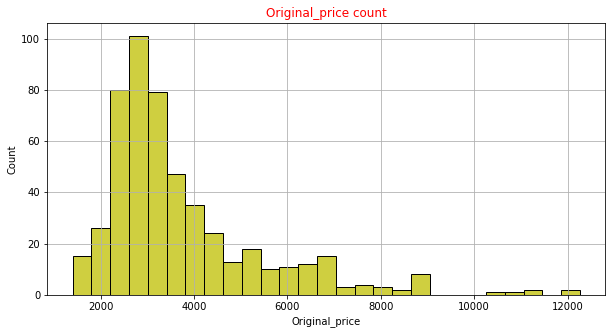

In [91]:
plt.figure(figsize=(10,5))
sns.histplot(x=data1["Original_price"],color="y",edgecolor="k")
plt.grid()
plt.title('Original_price count',color= 'r')
plt.show()


# Box plot

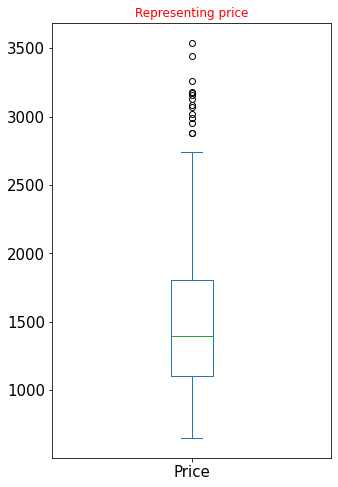

In [92]:
plt.figure(figsize = (5,8))
data1['Price'].describe()
ax = data1['Price'].plot.box(fontsize = 15)
plt.title('Representing price',color='r')
plt.show()

In [93]:
data1['Price'].describe()

count     512.000000
mean     1517.632812
std       524.350406
min       649.000000
25%      1099.000000
50%      1393.000000
75%      1803.250000
max      3540.000000
Name: Price, dtype: float64

# Bivariate plots:

### Bar plot

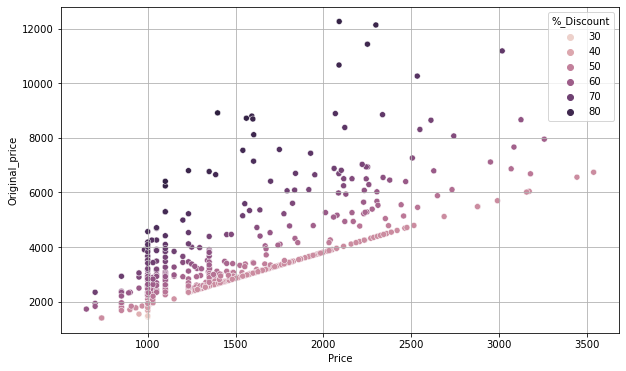

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data1["Price"],hue = data1["%_Discount"],y=data1["Original_price"])
plt.grid()
plt.show()

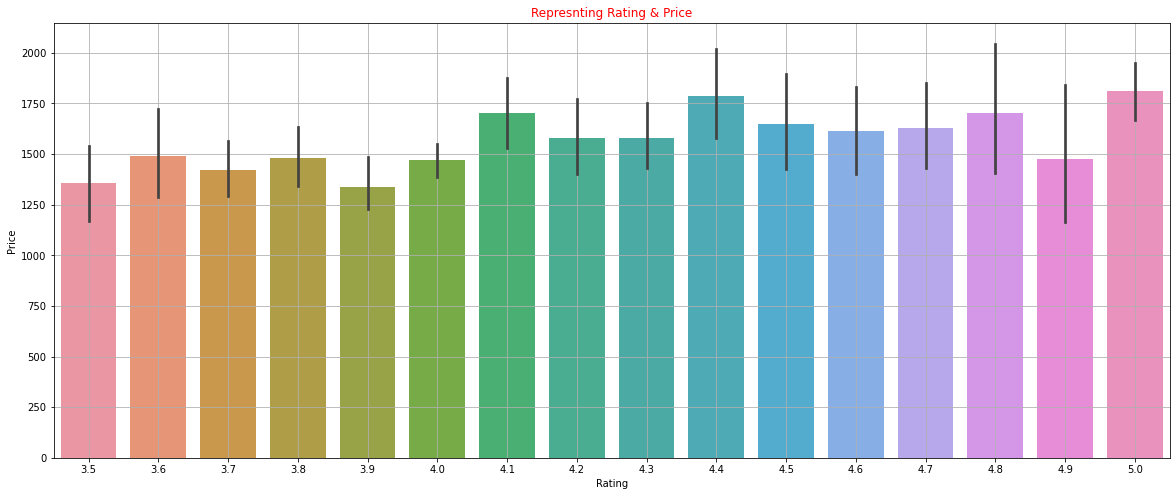

In [95]:
plt.figure(figsize=(20,8))
sns.barplot(x=data1["Rating"],y=data1["Price"])
plt.grid()
plt.title('Represnting Rating & Price',color='r')
plt.show()

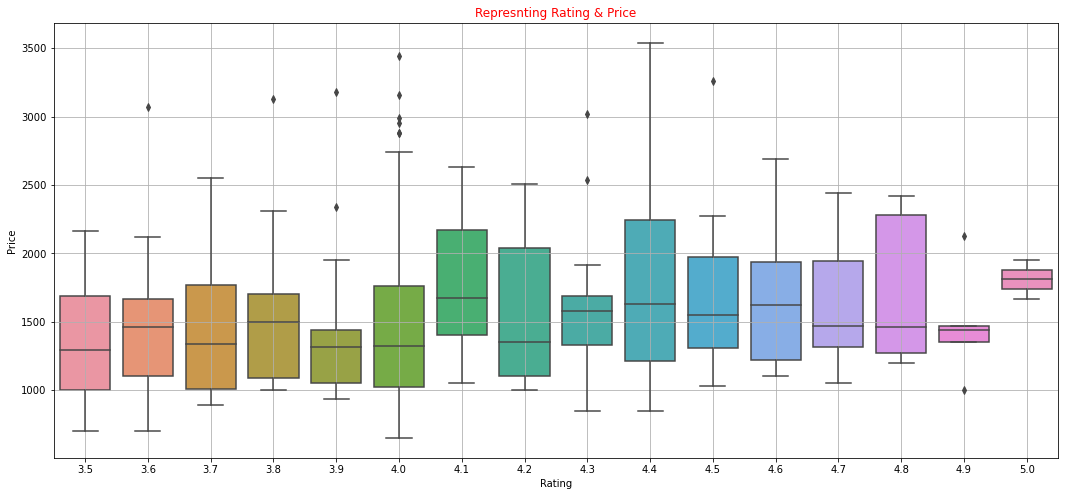

In [96]:
plt.figure(figsize=(18,8))
sns.boxplot(x=data1["Rating"],y=data1["Price"])
plt.grid()
plt.title('Represnting Rating & Price',color='r')
plt.show()

### vilonplot

In [97]:
c = []
for i in data1.city:
    if i == 'Goa':
        c.append('Goa')
    elif i == 'Ooty':
        c.append('Ooty')
    else:
        c.append('Hyderabad')

In [98]:
data1['city']=c

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='Price'>

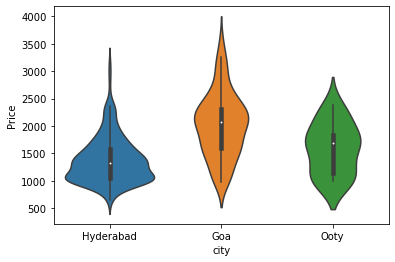

In [99]:
sns.violinplot(data1['city'],data1['Price'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='Rating'>

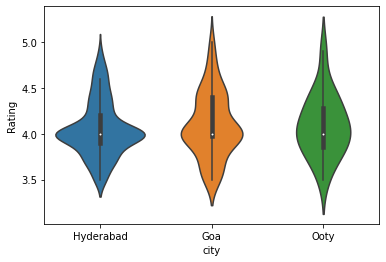

In [100]:
sns.violinplot(data1['city'],data1['Rating'])

In [101]:
data1['Rating'].value_counts()

4.0    171
3.9     41
3.8     40
3.7     38
4.4     35
4.2     29
4.3     26
4.1     25
3.5     22
4.5     20
3.6     19
4.6     16
4.7     15
4.8      8
4.9      5
5.0      2
Name: Rating, dtype: int64

### scatter plot

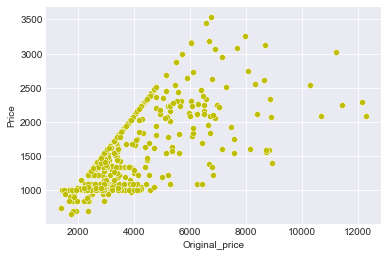

In [102]:
plt.style.use('seaborn-darkgrid')
sns.scatterplot(x=data1['Original_price'],y = data1['Price'],data =data1,color = 'y')
plt.show()

### Regplot

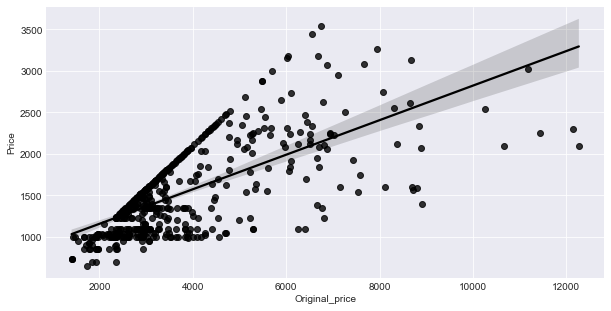

In [103]:
plt.figure(figsize = (10,5))
sns.regplot(x=data1['Original_price'],y=data1['Price'],data=data1,color = 'k')
plt.show()

### Boxplot

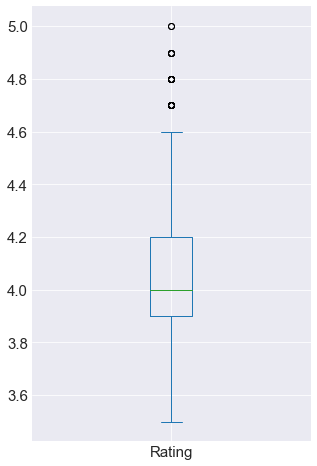

In [104]:
plt.figure(figsize = (5,8))
data1['Rating'].describe()
ax = data1['Rating'].plot.box(fontsize = 15)
plt.show()

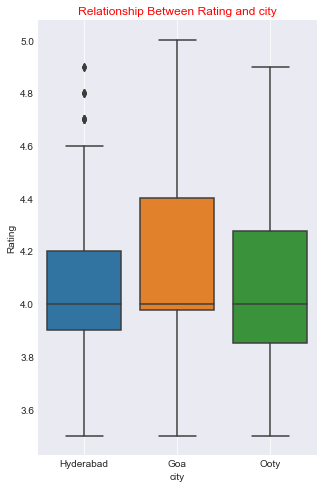

In [143]:

plt.figure(figsize=(5,8))
sns.boxplot(x=data1["city"],y=data1["Rating"])
plt.grid()
plt.title('Relationship Between Rating and city',color = 'r')
plt.show()


### lineplot

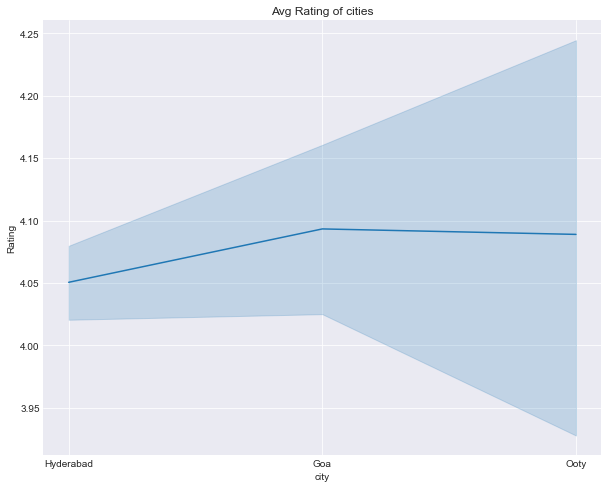

In [106]:
plt.figure(figsize=(10,8))
sns.lineplot(x=data1["city"],y=data1["Rating"])
plt.title('Avg Rating of cities')
plt.show()

# Multivariate plots

### Heatmap

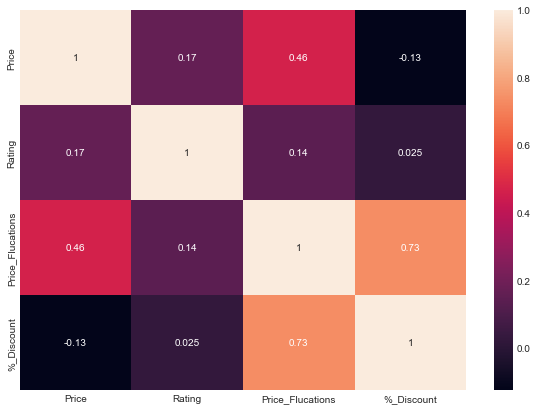

In [152]:
plt.figure(figsize=(10,7))
sns.heatmap(data1[['Price','Rating','Price_Flucations','%_Discount']].corr(),annot=True)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


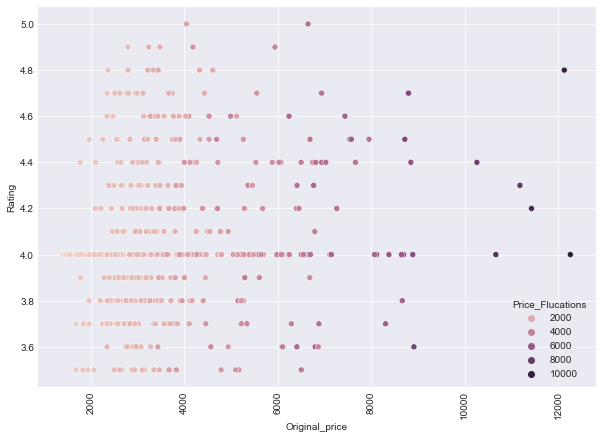

In [108]:
plt.figure(figsize=(10,7))
sns.scatterplot(data1['Original_price'],data1['Rating'],hue=data1['Price_Flucations'],)
plt.xticks(rotation=90)
plt.show()
import warnings
warnings.filterwarnings("ignore")

In [109]:
data1.Price.describe()

count     512.000000
mean     1517.632812
std       524.350406
min       649.000000
25%      1099.000000
50%      1393.000000
75%      1803.250000
max      3540.000000
Name: Price, dtype: float64

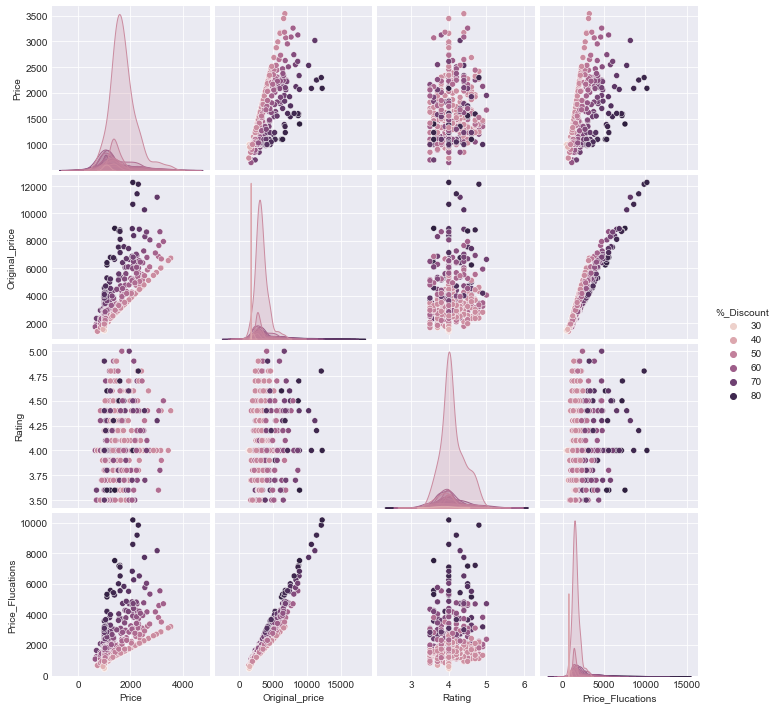

In [110]:
sns.pairplot(data=data1,hue='%_Discount')
plt.show()

#### page

In [111]:
df = data1.groupby('city')['city'].count().to_frame()

In [112]:
df

,city
city,
Goa,104
Hyderabad,390
Ooty,18


In [113]:
city_wise_details = pd.pivot_table(data1,index = ['city'])
city_wise_details

,%_Discount,Original_price,Price,Price_Flucations,Rating
city,,,,,
Goa,64.932692,6192.846154,2023.336538,4169.509615,4.093269
Hyderabad,53.653846,3049.153846,1379.379487,1669.774359,4.050513
Ooty,62.333333,4333.444444,1591.277778,2742.166667,4.088889


In [114]:
data1['%_Discount'].describe()

count    512.000000
mean      56.250000
std       10.043545
min       30.000000
25%       47.000000
50%       54.000000
75%       64.000000
max       84.000000
Name: %_Discount, dtype: float64

In [115]:
data1['Price'].describe()

count     512.000000
mean     1517.632812
std       524.350406
min       649.000000
25%      1099.000000
50%      1393.000000
75%      1803.250000
max      3540.000000
Name: Price, dtype: float64

In [116]:
data1['Original_price'].describe()

count      512.000000
mean      3732.867188
std       1727.593733
min       1402.000000
25%       2639.500000
50%       3148.000000
75%       4254.500000
max      12266.000000
Name: Original_price, dtype: float64

In [117]:
data1['Price_Flucations'].describe()

count      512.000000
mean      2215.234375
std       1420.240772
min        440.000000
25%       1367.000000
50%       1714.000000
75%       2554.750000
max      10176.000000
Name: Price_Flucations, dtype: float64

In [118]:
data1['Rating'].describe()

count    512.000000
mean       4.060547
std        0.315059
min        3.500000
25%        3.900000
50%        4.000000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64

In [119]:
data1.groupby(['city','Rating'])['Price'].agg({'mean','min','max'})

mean   min   max
city      Rating                         
Goa       3.5     1775.666667   999  2163
          3.6     1810.285714  1099  3070
          3.7     2112.250000  1579  2550
          3.8     1892.857143  1029  3126
          3.9     2502.000000  1824  3180
          4.0     1986.026316   980  3445
          4.1     2418.000000  2207  2629
          4.2     2356.000000  2248  2507
          4.3     2048.400000  1349  3019
          4.4     2235.583333  1231  3540
          4.5     2060.166667  1541  3259
          4.6     1513.000000  1099  1927
          4.7     2095.666667  1592  2443
          4.8     1911.500000  1524  2299
          4.9     2128.000000  2128  2128
          5.0     1809.500000  1668  1951
Hyderabad 3.5     1209.733333   699  1819
          3.6     1300.833333   699  1722
          3.7     1325.121212   890  2023
          3.8     1377.033333   999  2308
          3.9     1277.512821   931  2336
          4.0     1311.109375   649  2952
          4.1     1613.954545  1049  2387
          4.2     1378.318182   999  2464
          4.3     1456.700000   849  1915
          4.4     1555.904762   849  3173
          4.5     1453.538462  1029  2274
          4.6     1625.428571  1099  2688
          4.7     1514.166667  1049  2325
          4.8     1634.166667  1199  2420
          4.9     1417.333333  1349  1466
Ooty      3.5      999.000000   999   999
          3.7     1753.000000  1753  1753
          3.8     1577.000000  1099  1854
          4.0     1569.600000   999  2229
          4.1     2170.000000  2170  2170
          4.2     1836.500000  1295  2378
          4.3     1673.000000  1673  1673
          4.4     1550.500000   999  2102
          4.5     1696.000000  1696  1696
          4.9      999.000000   999   999

In [120]:
data1.groupby('Rating')['Price'].agg({'mean','min','max'})

,mean,min,max
Rating,,,
3.5,1354.500000,699,2163
3.6,1488.526316,699,3070
3.7,1419.236842,890,2550
3.8,1482.300000,999,3126
3.9,1337.243902,931,3180
4.0,1468.649123,649,3445
4.1,1700.520000,1049,2629
4.2,1578.482759,999,2507
4.3,1578.807692,849,3019


In [121]:
data1.groupby(['city','%_Discount'])['Price'].agg({'mean','min','max'})

mean   min   max
city %_Discount                         
Goa  47          3088.166667  2516  3540
     48           999.000000   999   999
     50          2371.000000  2371  2371
     51          1723.000000  1414  2032
     52          2558.666667  2039  3180
...                      ...   ...   ...
Ooty 69          2102.000000  2102  2102
     72          1099.000000  1099  1099
     73           999.000000   999   999
     75           999.000000   999   999
     76           999.000000   999   999

[85 rows x 3 columns]

In [122]:
data1.groupby(['%_Discount'])['Price'].agg({'mean','min','max'})

,mean,min,max
%_Discount,,,
30,999.000000,999,999
32,999.000000,999,999
38,949.000000,949,949
40,999.000000,999,999
43,999.000000,999,999
45,1074.000000,999,1149
47,1697.954023,736,3540
48,1228.800000,999,1480
49,1368.631579,849,1778


In [123]:
sort_rating = data1.sort_values('Rating',ascending=False);

In [124]:
sort_rating['Rating']

410    5.0
392    5.0
493    4.9
10     4.9
33     4.9
      ... 
378    3.5
293    3.5
169    3.5
484    3.5
497    3.5
Name: Rating, Length: 512, dtype: float64

In [145]:
sort_rating1 = data1.sort_values('Rating',ascending=True);

In [146]:
sort_rating1['Rating']

43     3.5
378    3.5
436    3.5
241    3.5
482    3.5
      ... 
493    4.9
37     4.9
10     4.9
410    5.0
392    5.0
Name: Rating, Length: 512, dtype: float64

In [125]:
df1_Rating = sort_rating.loc[data1['Rating']> 4.0]

In [126]:
city0 = df1_Rating[df1_Rating['city']=='Goa'].head()

In [127]:
city0

,Hotel_name,Price,Original_price,city,location,Area,Rating,Rating_summary,Price_Flucations,%_Discount
410,OYO 65004 La Vihan Resort,1951,6649,Goa,,Vihan Resort,5.0,Fabulous,4698,70
392,SPOT ON 65327 Ashwem Beach Guest House,1668,4045,Goa,Near Ashvem,Guest House,5.0,Fabulous,2377,58
422,OYO Flagship 83509 Savita Holiday Goa,2128,5940,Goa,,Holiday Goa,4.9,Fabulous,3812,64
448,"OYO 85106 Hotel Elvin,s Place",2299,12137,Goa,,"Elvin,s Place",4.8,Excellent,9838,81
426,OYO 83865 Baba Guest House,1524,3331,Goa,Goa,Guest House,4.8,Excellent,1807,54


In [128]:
city1 = df1_Rating[df1_Rating['city']=='Hyderabad'].head()

In [129]:
city1

,Hotel_name,Price,Original_price,city,location,Area,Rating,Rating_summary,Price_Flucations,%_Discount
10,OYO 35467 Shiridi Residency,1349,3238,Hyderabad,Near Chermas,Shiridi Residency,4.9,Fabulous,1889,58
33,Townhouse 733 Whiteridge Gachibowli Townhouse,1437,3477,Hyderabad,,Gachibowli Townhouse,4.9,Fabulous,2040,58
37,OYO 84191 Residency Inn,1466,2792,Hyderabad,,Residency Inn,4.9,Fabulous,1326,47
35,Collection O 81765 Hotel White Ridge,1243,2367,Hyderabad,Ward 104,White Ridge,4.8,Excellent,1124,47
120,OYO 78286 Collection O White Ridge,2420,4609,Hyderabad,LB,White Ridge,4.8,Excellent,2189,47


In [130]:
city2 = df1_Rating[df1_Rating['city']=='Ooty'].head()

In [131]:
city2

,Hotel_name,Price,Original_price,city,location,Area,Rating,Rating_summary,Price_Flucations,%_Discount
493,OYO 78034 New Star Cottages,999,4184,Ooty,Tamil,Star Cottages,4.9,Fabulous,3185,76
499,Collection O 83248 Silent Valley,1696,4528,Ooty,,Silent Valley,4.5,Excellent,2832,62
500,OYO 10950 Hotel Hills Palace,2102,6813,Ooty,Near Charing Cross,Hills Palace,4.4,Very Good,4711,69
503,OYO Flagship 44245 Hotel Rainforest Thalayathi...,999,3997,Ooty,Near Eye foundation Elk,Rainforest Thalayathimund,4.4,Very Good,2998,75
509,OYO 78121 Red Rock,1673,3938,Ooty,Near,Red Rock,4.3,Very Good,2265,57


In [132]:
final_best = pd.concat([city0,city1,city2])

In [133]:
del final_best['location']

In [136]:
final_best

,Hotel_name,Price,Original_price,city,Area,Rating,Rating_summary,Price_Flucations,%_Discount
410,OYO 65004 La Vihan Resort,1951,6649,Goa,Vihan Resort,5.0,Fabulous,4698,70
392,SPOT ON 65327 Ashwem Beach Guest House,1668,4045,Goa,Guest House,5.0,Fabulous,2377,58
422,OYO Flagship 83509 Savita Holiday Goa,2128,5940,Goa,Holiday Goa,4.9,Fabulous,3812,64
448,"OYO 85106 Hotel Elvin,s Place",2299,12137,Goa,"Elvin,s Place",4.8,Excellent,9838,81
426,OYO 83865 Baba Guest House,1524,3331,Goa,Guest House,4.8,Excellent,1807,54
10,OYO 35467 Shiridi Residency,1349,3238,Hyderabad,Shiridi Residency,4.9,Fabulous,1889,58
33,Townhouse 733 Whiteridge Gachibowli Townhouse,1437,3477,Hyderabad,Gachibowli Townhouse,4.9,Fabulous,2040,58
37,OYO 84191 Residency Inn,1466,2792,Hyderabad,Residency Inn,4.9,Fabulous,1326,47
35,Collection O 81765 Hotel White Ridge,1243,2367,Hyderabad,White Ridge,4.8,Excellent,1124,47
120,OYO 78286 Collection O White Ridge,2420,4609,Hyderabad,White Ridge,4.8,Excellent,2189,47


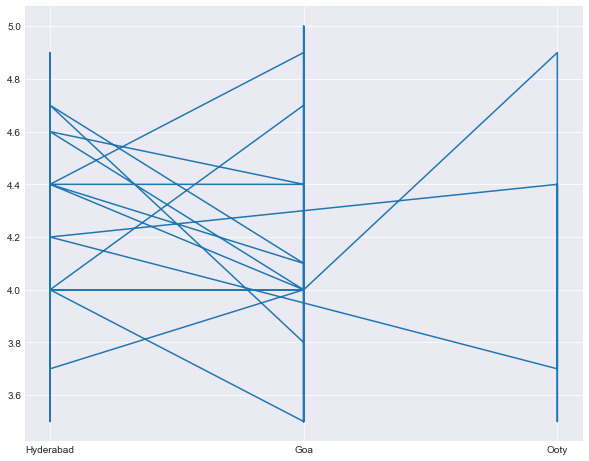

In [134]:
plt.figure(figsize=(10,8))
plt.plot(data1["city"],data1["Rating"])
plt.show()

In [142]:
data1.describe()

,Price,Original_price,Rating,Price_Flucations,%_Discount
count,512.000000,512.000000,512.000000,512.000000,512.000000
mean,1517.632812,3732.867188,4.060547,2215.234375,56.250000
std,524.350406,1727.593733,0.315059,1420.240772,10.043545
min,649.000000,1402.000000,3.500000,440.000000,30.000000
25%,1099.000000,2639.500000,3.900000,1367.000000,47.000000
50%,1393.000000,3148.000000,4.000000,1714.000000,54.000000
75%,1803.250000,4254.500000,4.200000,2554.750000,64.000000
max,3540.000000,12266.000000,5.000000,10176.000000,84.000000


In [147]:
data1.corr()

,Price,Original_price,Rating,Price_Flucations,%_Discount
Price,1.000000,0.685776,0.168338,0.464985,-0.125108
Original_price,0.685776,1.000000,0.166248,0.963222,0.565375
Rating,0.168338,0.166248,1.000000,0.140075,0.025016
Price_Flucations,0.464985,0.963222,0.140075,1.000000,0.733917
%_Discount,-0.125108,0.565375,0.025016,0.733917,1.000000
